In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
plt.rcParams.update({'font.size': 20})

from matplotlib.patches import Rectangle
from datetime import datetime
from matplotlib.pyplot import cm

In [3]:
df = pd.read_table('./datasets/metocean.csv', delimiter = ',')
df

,Year,Month,Day,Hour,Hs (m),v10 (m/s)
0,2008,1,1,0,3.446098,6.504866
1,2008,1,1,6,3.337338,7.705570
2,2008,1,1,12,3.195431,7.402196
3,2008,1,1,18,2.971436,6.317548
4,2008,1,2,0,3.067249,7.646887
...,...,...,...,...,...,...
14595,2017,12,30,18,4.619158,10.236058
14596,2017,12,31,0,4.509621,7.472284
14597,2017,12,31,6,3.979025,6.199845
14598,2017,12,31,12,3.666209,11.561856


In [4]:
# Use pd.to_datetime to convert columns to datetime object
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
date = df.iloc[:,0:4]
date = np.array(pd.to_datetime(date))

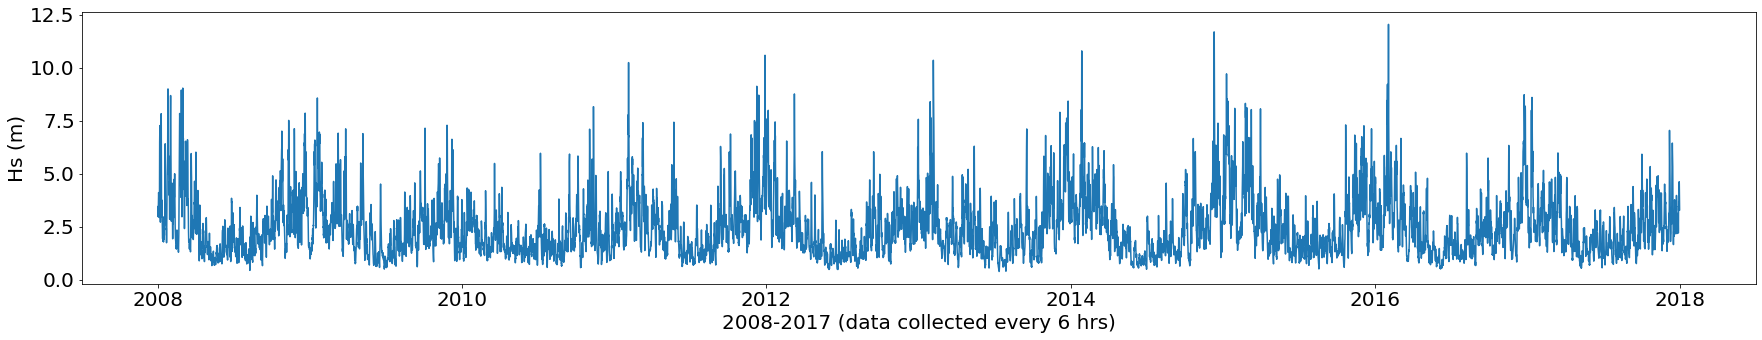

In [5]:
# Assing x = date, y = df to plot with datetime
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.figure(figsize=[30,5])
plt.plot(date,df.iloc[:,4])
plt.ylabel('Hs (m)')
plt.xlabel('2008-2017 (data collected every 6 hrs)')
plt.show()

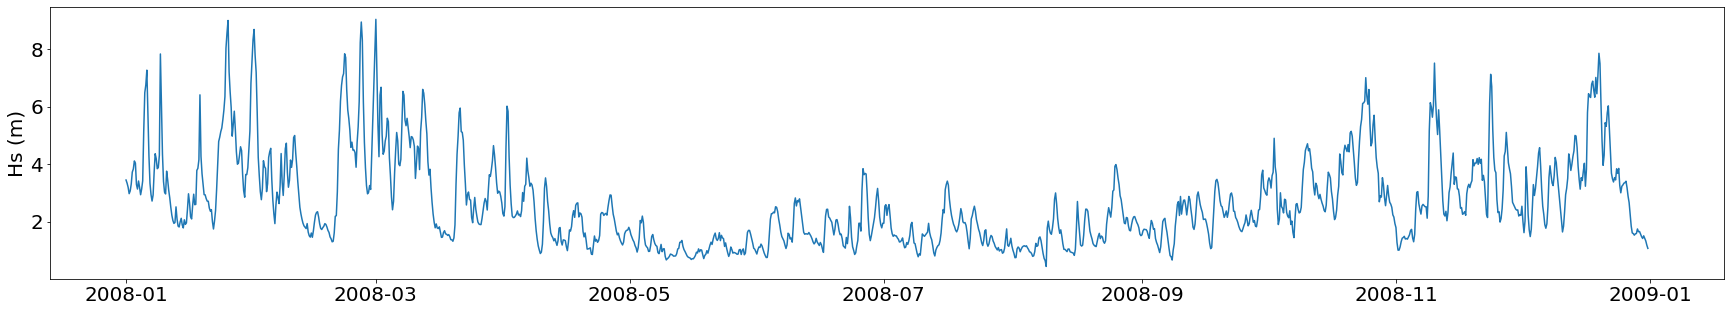

In [15]:
# Set the index to use slice of the date
# e.g. date[:366] and df.iloc[:366,4]
plt.figure(figsize=[30,5])
plt.plot(date[:1459],df.iloc[:1459,4])
plt.ylabel('Hs (m)')
plt.show()

# One Week Window Size, Hs Multiple Motifs


In [16]:
m = 28 # set window size
mp = stumpy.stump(df.iloc[:,4],m) # calculate matrix profile 

In [17]:
# np.unique: extract only one idx of pair, it automatically sort the return
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
motif_idx = np.array([],dtype=np.int)
for i in np.unique(mp[:,0]):
    motif_idx = np.append(motif_idx,np.where(mp[:,0] == i)[0][0])
nearest_neighbor_idx = mp[motif_idx, 1]

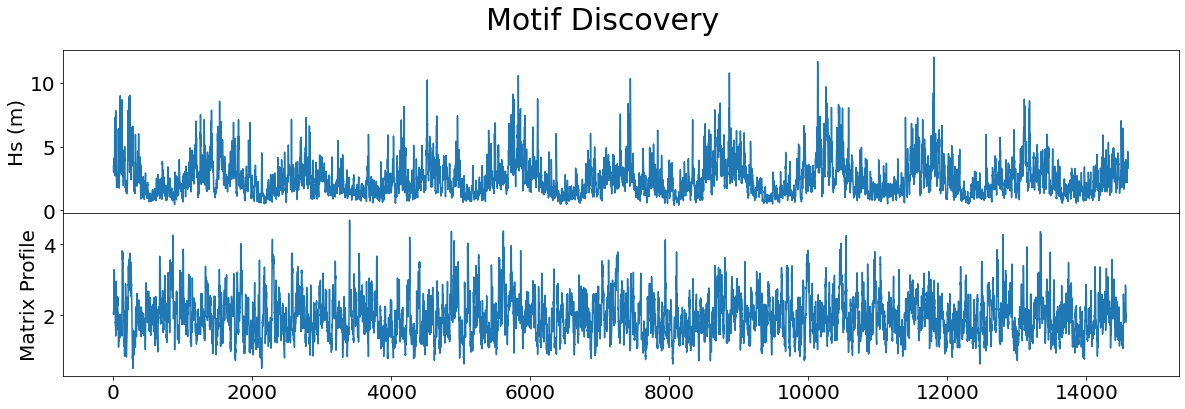

In [18]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Motif Discovery', fontsize='30')
axs[0].plot(df.iloc[:,4].values)
axs[0].set_ylabel('Hs (m)', fontsize='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].plot(mp[:, 0])
plt.show()

# Normalizing Data

In [37]:
np.mean(mp, axis = 0)[0]

1.9438586585309907

In [26]:
mp[:,0]/np.mean(mp, axis = 0)[0]

array([1.0621201709727126, 1.0492963798906647, 1.044554235155899, ...,
       1.057692825235453, 1.004868678964649, 0.9305521343089685],
      dtype=object)

1.0000000000000047

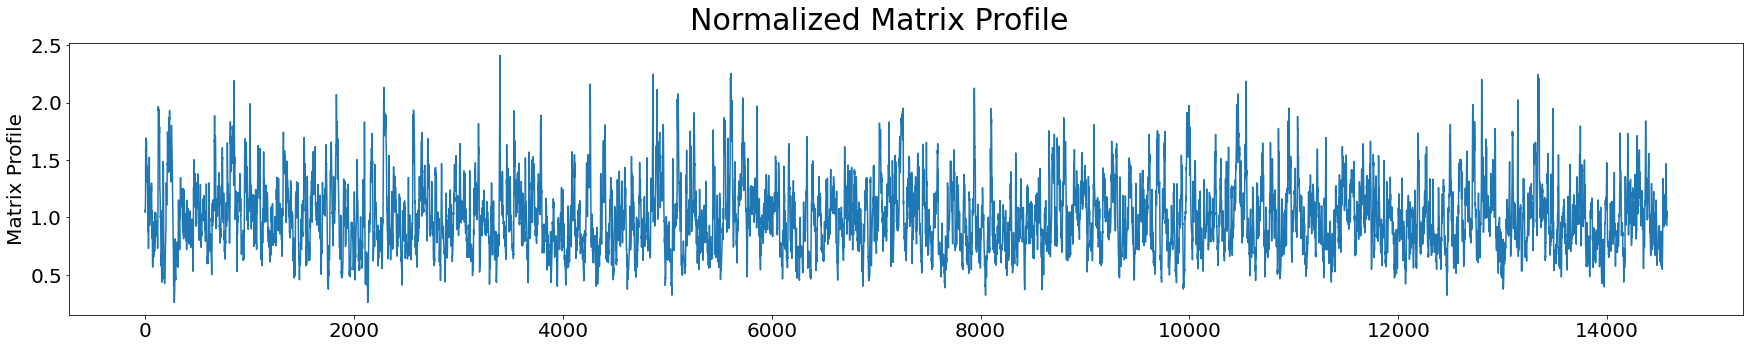

In [70]:
normalized = mp[:,0]/np.mean(mp, axis = 0)[0]
plt.figure(figsize=[30,5])
plt.plot(normalized)
plt.ylabel('Matrix Profile')
plt.suptitle('Normalized Matrix Profile', fontsize = '30')
np.mean(normalized)

In [42]:
print(np.max(normalized))
print(np.min(normalized))

2.410382903066653
0.2609815244647595


# Function 

In [53]:
def windowsizes(m):
    mp = stumpy.stump(df.iloc[:,4],m) 
    np.mean(mp, axis = 0)[0]
    normalized = mp[:,0]/np.mean(mp, axis = 0)[0]
    return{'max':np.max(normalized),'min':np.min(normalized),'m':m}

In [54]:
windowsizes(28)

{'max': 2.410382903066653, 'min': 0.2609815244647595, 'm': 28}

In [97]:
msizes = [4,8,12,16,20,24,28,56,84]

In [71]:
maxes = {}
mins = {}
for msize in msizes: 
    maxes[windowsizes(msize)['max']]=msize
    mins[windowsizes(msize)['min']]=msize


In [72]:
print(maxes)

{8.905252174307362: 4, 4.970506521084852: 8, 3.683115400499054: 12, 3.2191548074701752: 16, 2.702715099837579: 20, 2.485293469972596: 24, 2.410382903066653: 28, 1.8179407487374386: 56, 1.5607242781116437: 84, 1.3487526695101313: 120, 1.1726424507434272: 728, 1.1338516443995759: 1460, 1.1172944144593462: 2920}


In [62]:
maxmax= maxes.keys()
print(max(maxmax))                 

8.905252174307362


In [73]:
print(mins)

{0.013230281911505107: 4, 0.08135559551039685: 8, 0.17430877302989511: 12, 0.19423509395010075: 16, 0.23629188434135406: 20, 0.26896071886885153: 24, 0.2609815244647595: 28, 0.5064099186789696: 56, 0.5375987938337821: 84, 0.5864952511774459: 120, 0.8390560055832527: 728, 0.9000930365470577: 1460, 0.9534414098120597: 2920}


In [88]:
m = 4
mp = stumpy.stump(df.iloc[:,4],m) 

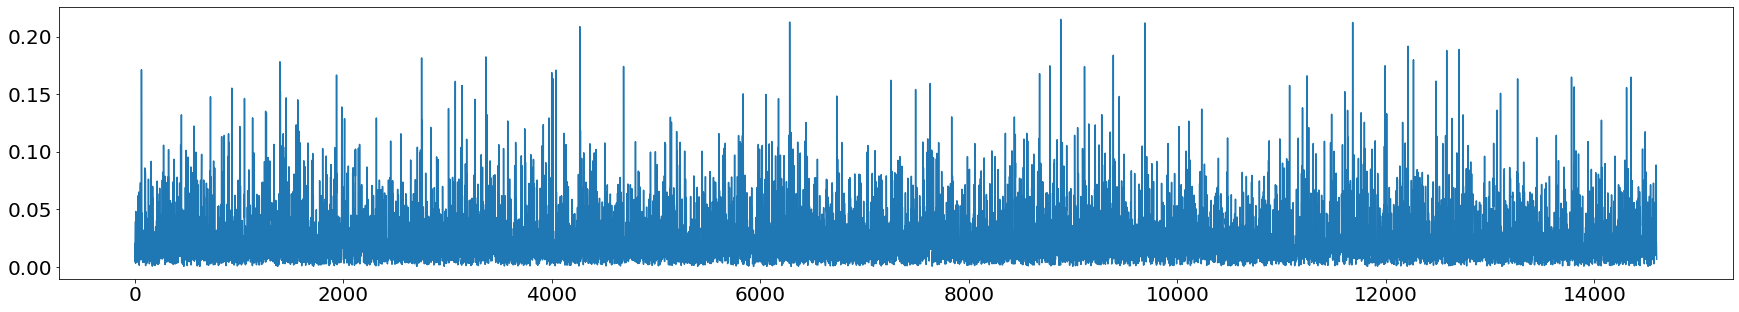

In [96]:
plt.figure(figsize=[30,5])
plt.plot(mp[:,0])